# Flow, Paths and Limit Cycles 

First read some libraries needed. 


In [12]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

## Routine to create the phase diagram
last time we made some function to create phase diagram. Since we will use them here as well.

In [4]:
def plot_flow(ax,rhs,xrange=[-2.5,2.5],yrange=[-2.5,2.5],xnum=100,ynum=100,nullclines=False):
    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(0,np.array([uu[i,j], vv[i,j]]))


# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
# def plot_solution(ax,rhs,y0,t_end,t_dim=2000,color='green',init_pt=True,linewidth=2.5):

#     t = np.linspace(0, t_end, t_dim)
#     X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t)
#     x,y=X.y
#     t=X.t
#     ax.plot(x,y, color=color,linewidth=linewidth)
#     if (init_pt):
#         ax=plot_point(ax,y0,color=color)
#     return ax

def get_solution(rhs, y0, t_end, t_dim=2000):
    t = np.linspace(0, t_end, t_dim)
    sol = sc.integrate.solve_ivp(rhs, t_span=[t[0], t[-1]], y0=y0, t_eval=t)
    return sol

def plot_solution(ax, rhs, y0, t_end, t_dim=2000, color='green', init_pt=True, linewidth=2.5):
    sol = get_solution(rhs, y0, t_end, t_dim)
    x, y = sol.y
    ax.plot(x, y, color=color, linewidth=linewidth)
    if init_pt:
        ax = plot_point(ax, y0, color=color)
    return ax

def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



# A nonlinear example 
We will use
$$
\begin{array}{rl}
 \dot{x}(t) = & y \\[0.5pt]
 \dot{y}(t) = & x(1-x^2)-y
\end{array}
$$
as an example. Defining the function:

In [6]:
def rhs(t,xy):
    x,y=xy
    dx=y
    dy=x*(1-x**2)-y
    return [dx,dy]

### Linear analysis (analytical)
Isocline when $\dot{x}$ is zero when $y=0$. 

Isocline for $\dot{y}$ is zero when $y=x(1-x^2)=x(1-x)(1+x)$.  

Hence equilibrium points at $(x,y)=(0,0)$ (saddle point), $(x,y)=(1,0)$ and $(x,y)=(-1,0)$ (both stable spirals).

**Check this**

Lets plot the flow and the isoclines, see that the isoclines cross each other at the right places.



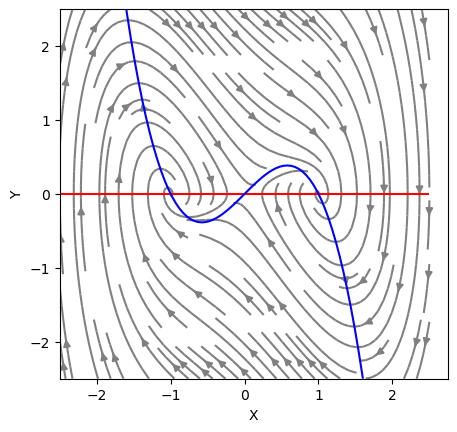

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)



## Numerical linear analysis
From the previous figure, it looks like we have fixed points at (-1,0), (0,0) and (1,0). We have found this already. Can we do the analysis through numerics? 

Defining some functions.

In [13]:
def jacobian(rhs, xy, eps=1e-8):
    """
    Compute the Jacobian matrix of a system of differential equations at a given point.
    Parameters:
    rhs (function): The right-hand side function of the differential equations. It should take two arguments: time (t) and state (xy).
    xy (array-like): The point (x, y) at which to evaluate the Jacobian.
    eps (float, optional): A small perturbation value for numerical differentiation. Default is 1e-8.
    Returns:
    numpy.ndarray: A 2x2 Jacobian matrix evaluated at the point (x, y).
    Note:
    This function uses finite differences to approximate the partial derivatives.

    WARNING: The code and comment are from Gemini, use at own risk. 
    """

    
    f0 = np.array(rhs(0, xy))
    jac = np.zeros((2, 2))
    
    for i in range(2):
        dxy = np.zeros(2)
        dxy[i] = eps
        f1 = np.array(rhs(0, xy + dxy))
        jac[:, i] = (f1 - f0) / eps
    
    return jac

def eigenvalues_eigenvectors(jac):
    """
    Calculate the eigenvalues and eigenvectors of a given Jacobian matrix.
    Parameters:
    jac (numpy.ndarray): A square matrix representing the Jacobian matrix.
    Returns:
    tuple: A tuple containing two elements:
        - eigenvalues (numpy.ndarray): An array of eigenvalues.
        - eigenvectors (numpy.ndarray): An array of eigenvectors, where each column is an eigenvector corresponding to the eigenvalue at the same index.
    """

    eigenvalues, eigenvectors = np.linalg.eig(jac)
    return eigenvalues, eigenvectors


# Example usage
xy = [1, 0]
jac = jacobian(rhs, xy)
print(jac)

# Example usage
eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

print("J:")
pprint(jac)
print()

for i in range(len(eigenvalues)):
    pprint(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    pprint(f"Eigenvector {i+1}: {eigenvectors[:, i]}")
    print()


[[ 0.          1.        ]
 [-2.00000001 -1.        ]]
J:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])

'Eigenvalue 1: (-0.5+1.3228756584974484j)'
'Eigenvector 1: [-0.20412414-0.54006172j  0.81649658+0.j        ]'

'Eigenvalue 2: (-0.5-1.3228756584974484j)'
'Eigenvector 2: [-0.20412414+0.54006172j  0.81649658-0.j        ]'



Let's find the equilibrium points numericaly.


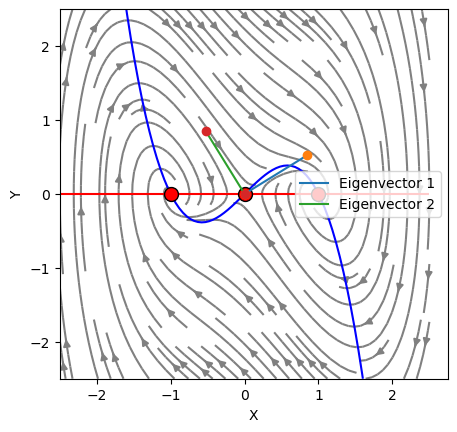

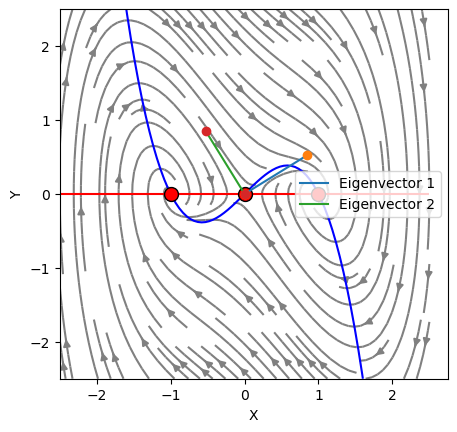

In [30]:
# Plot the eigenvectors in the phase diagram for the ones with real eigenvalues
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Plot the flow
ax = plot_flow(ax, rhs, nullclines=True)

# Plot the equilibrium points
for point in equilibrium_points:
    ax = plot_point(ax, point, color='red')

# Plot the eigenvectors for the equilibrium points with real eigenvalues
for point in equilibrium_points:
    jac = jacobian(rhs, point)
    eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
    
    if np.all(np.isreal(eigenvalues)):
        for i in range(len(eigenvalues)):
            eigenvector = eigenvectors[:, i]
            start_point = point
            end_point = point + eigenvector
            
            ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f'Eigenvector {i+1}')
            ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'o')

ax.legend()
plt.show()
fig

In [20]:
from scipy.optimize import fsolve

# Define the system of equations for equilibrium points
def equilibrium_points(xy):
    return rhs(0, xy)

# Initial guesses for the equilibrium points
initial_guesses = [[0.3, 0], [1, 0], [-1, 0]]

# Find the equilibrium points
equilibrium_points = [fsolve(equilibrium_points, guess) for guess in initial_guesses]

# Print the equilibrium points
for point in equilibrium_points:
    print(f"Equilibrium point: {point}")

Equilibrium point: [0. 0.]
Equilibrium point: [1. 0.]
Equilibrium point: [-1.  0.]


In [29]:
for point in equilibrium_points:
    jac = jacobian(rhs, point)
    eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
    
    print(f"Equilibrium point: {point}")
    print("Jacobian matrix:")
    pprint(jac)
    print("Eigenvalues:")
    pprint(eigenvalues)
    
    if np.all(np.isreal(eigenvalues)):
        print("Eigenvectors:")
        pprint(eigenvectors)
    
    print()

Equilibrium point: [0. 0.]
Jacobian matrix:
array([[ 0.,  1.],
       [ 1., -1.]])
Eigenvalues:
array([ 0.61803399, -1.61803399])
Eigenvectors:
array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

Equilibrium point: [1. 0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])
Eigenvalues:
array([-0.5+1.32287566j, -0.5-1.32287566j])

Equilibrium point: [-1.  0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-1.99999998, -1.        ]])
Eigenvalues:
array([-0.5+1.32287565j, -0.5-1.32287565j])



# Some definitions

### Definition of **flow** (Definition 2 on p 118) 
A _flow_ is a mapping $\pi: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ such that: 
1. $\pi$ is continuous
2. $\pi(\bf{x},0)=\bf{x} \ \forall \ \bf{x}\in \mathbb{R}^2$
3. $\pi(\pi(\bf{x},t_1),t_2)=\pi(\bf{x},t_1+t_2)$

### Definition of Trajectories or orbits (Definition 3 on p 118)
Suppose $I_{\bf{x}}$ is the maximal interval of existence. 
A trajectory through $\bf{x}$ is defined as 
$$
\gamma(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}}
$$


- Positive *semi-orbit* is defined: $\gamma^+(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t>0}$
- Negative *semi-orbit* is defined: $\gamma^-(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t<0}$

# Our example
Lets plot some solutions

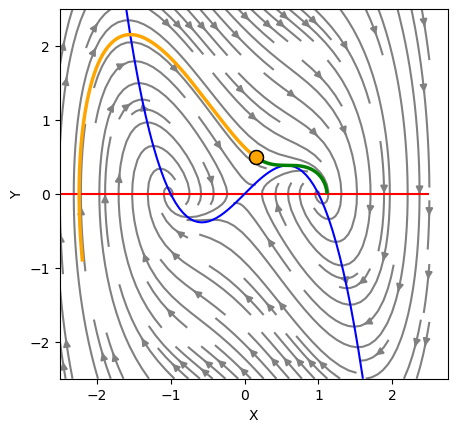

In [104]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)
y0=[0.15,0.5]
ax=plot_solution(ax,rhs,y0,t_end=3)
ax=plot_solution(ax,rhs,y0,t_end=-2,color='orange')

The orange path is by going backward in time. 

### Definition of limit sets (Definition 4 on p 118)
- The positive limit set of a point $\bf{x}$
$$
\Gamma^+ (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$
- The negative limit set of a point $\bf{x}$
$$
\Gamma^- (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow - \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$

In phase plane: critical points, closed orbit, or infinity. 

### Analysis of origin

In [105]:
xy = [0, 0]
jac = jacobian(rhs, xy)

eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [ 0.61803399 -1.61803399]
Eigenvectors:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


(-10.5, 10.5)

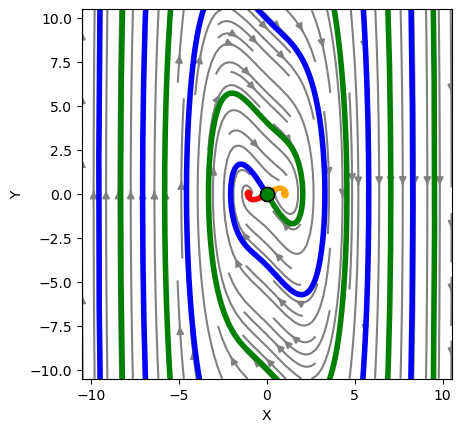

In [106]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
eps=1.e-8
xrange=[-10.5,10.5]
yrange=[-10.5,10.5]
ax=plot_flow(ax,rhs,xrange=xrange,yrange=yrange,nullclines=False)

y0=[0,0]+eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='orange', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='red', linewidth=4)
y0=[0,0]+eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, color='blue', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, linewidth=4)

ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])   

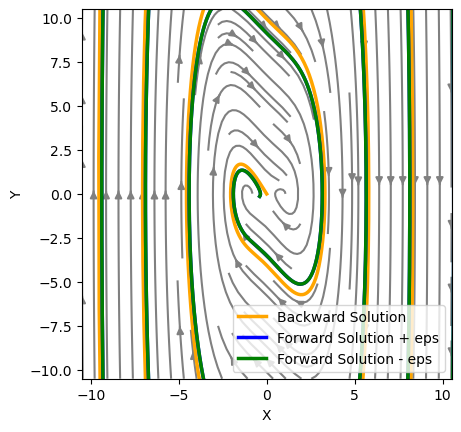

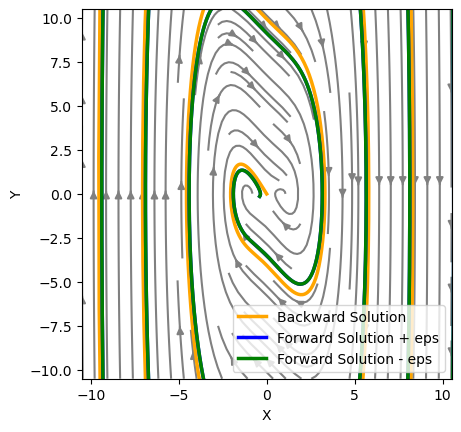

In [114]:
# Get the solution starting a short distance from the origin along the unstable eigenvector
y0 = [0, 0] + eps * eigenvectors[:, 1]
sol_backward = get_solution(rhs, y0, t_end=-20)

# Create two new solutions starting in the vicinity of this solution
y0_plus_eps = sol_backward.y[:, -1] + [eps, 0]
y0_minus_eps = sol_backward.y[:, -1] - [eps, 0]

# Integrate those forward
sol_plus_eps = get_solution(rhs, y0_plus_eps, t_end=10)
sol_minus_eps = get_solution(rhs, y0_minus_eps, t_end=10)

# Plot the solutions
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax = plot_flow(ax, rhs, xrange=xrange, yrange=yrange, nullclines=False)

# Plot the backward solution
ax.plot(sol_backward.y[0], sol_backward.y[1], color='orange', linewidth=2.5, label='Backward Solution')

# Plot the forward solutions
ax.plot(sol_plus_eps.y[0], sol_plus_eps.y[1], color='blue', linewidth=2.5, label='Forward Solution + eps')
ax.plot(sol_minus_eps.y[0], sol_minus_eps.y[1], color='green', linewidth=2.5, label='Forward Solution - eps')
ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])   
ax.legend()
plt.show()
fig

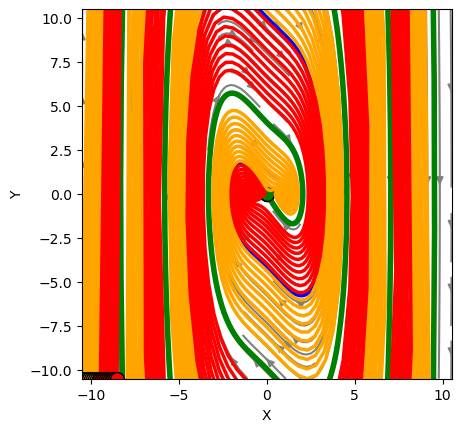

In [107]:
initial_x_values = np.linspace(xrange[0], xrange[0] + 2, 20)
initial_y_value = yrange[0]

for x_val in initial_x_values:
    y0 = [x_val, initial_y_value]
    sol = sc.integrate.solve_ivp(rhs, t_span=[0, 100], y0=y0, t_eval=np.linspace(0, 100, 1000))
    end_point = sol.y[:, -1]
    
    distance_to_1_0 = np.linalg.norm(end_point - np.array([1, 0]))
    distance_to_neg1_0 = np.linalg.norm(end_point - np.array([-1, 0]))
    
    if distance_to_1_0 < distance_to_neg1_0:
        color = 'orange'
    else:
        color = 'red'
    
    ax = plot_solution(ax, rhs, y0, t_end=100, color=color)

plt.show()
fig

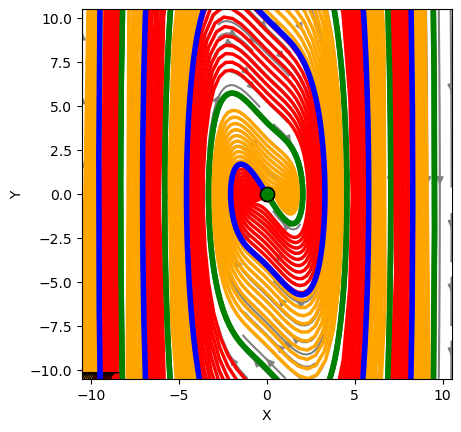

In [108]:
y0=[0,0]+eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='orange', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='red', linewidth=4)
y0=[0,0]+eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, color='blue', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, linewidth=4)

ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])   
plt.show()
fig

### Invariant sets
A set $S$ is *invariant* with respect to a flow if $\bf{x}\subset S$ implies that $\gamma(\bf{x})\subset S$.


## Basins of attractions
Our example has two stable spirals and one unstable saddle point. The saddle points has eigevalues and corresponding eigenvectors:
$$
\lambda^{\pm}=-\frac{1}{2}\pm\frac{1}{2}\sqrt{5}
$$
$$
\bf{v}_\pm=\left[\begin{array}{l} 1 \\ \lambda^\pm \end{array}\right]

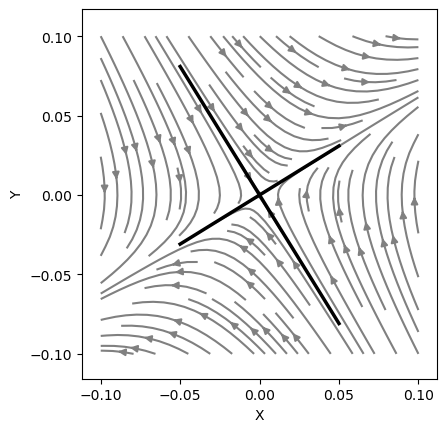

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,xrange=[-0.1,0.1],yrange=[-0.1,0.1],nullclines=False)

coord=[0,0]
scale=0.05
eigenv1=-0.5-0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv1,-eigenv1])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

eigenv2=-0.5+0.5*np.sqrt(5)
X,Y=np.array([1,-1]),np.array([eigenv2,-eigenv2])
ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

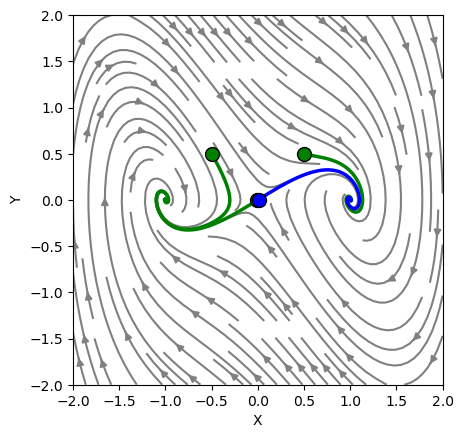

In [8]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=False)
y0=[0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.5,0.5]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[-0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100)
y0=[0.01,0]
ax=plot_solution(ax,rhs,y0,t_end=100,color='blue')


# coord=[0,0]
# scale=0.2
# eigenv1=-0.5-0.5*np.sqrt(5)
# X,Y=np.array([1,-1]),np.array([eigenv1,-eigenv1])
# ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

# eigenv2=-0.5+0.5*np.sqrt(5)
# X,Y=np.array([1,-1]),np.array([eigenv2,-eigenv2])
# ax.plot(scale*X,scale*Y,color='black',linewidth=2.5)

## Plot a solution starting a small distance along the stable direction moving backward in time 
#eps=0.01
#y0=np.array([eps,eps*eigenv1])
#ax=plot_solution(ax,rhs,y0,t_end=-1,color='orange')
#ax=plot_solution(ax,rhs,-y0,t_end=-1,color='orange')

# Limit cycles
Lets define two new examples

In [88]:

def holling_tanner(t,X):
    # here X[0] = x and X[1] = y
    return np.array([X[0] * (1 - X[0]/7) - 6 * X[0] * X[1] / (7 + 7*X[0]),
                    0.2 * X[1] * (1 - 0.5 * X[1] / X[0])])


#Here we see an example of giving parameters, with default values, to a function
def Fitzhugh_Nagumo(t,x,theta = 0.14, omega = 0.112, gamma = 2.54, epsilon = 0.01):
    return [-x[0] * (x[0] - theta) * (x[0] - 1) - x[1] + omega,
            epsilon * (x[0] - gamma * x[1])]

def pendulum(t,x,l=1,g=9.8):
    return np.array([x[1],-np.sin(x[0])])



## The pendulum

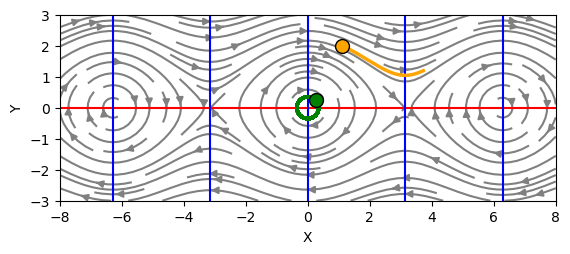

In [89]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,pendulum,xrange=[-8,8],yrange=[-3,3],nullclines=True)
ax=plot_solution(ax,pendulum,[0.25,0.25],t_end=200)
ax=plot_solution(ax,pendulum,[1.1,2],t_end=2,color='orange')

# Exercise
Can you draw the solutions going from $(-\pi,0)$ to $(\pi,0)$? 

## Holling Tanner

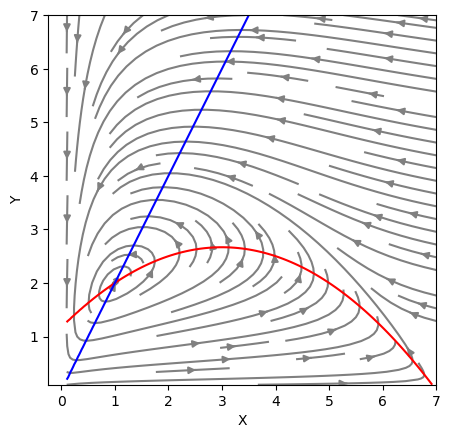

In [90]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,holling_tanner,xrange=[0.1,7],yrange=[0.1,7],nullclines=True)
#ax=plot_solution(ax,holling_tanner,[1.1,2],t_end=200,color='orange')
#ax=plot_solution(ax,holling_tanner,[0.25,0.25],t_end=200)


### Definition *limit cycle* (Definition 6 on p 188)
A limit cycle, $\Gamma$, is 
- a stable limit cycle if $\Lambda^+(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are attracted to the limit cycle.
- an stable limit cycle if $\Lambda^-(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are repelled from the limit cycle.
- a semi-stable limit cycle if it's attracting on one side and repelling on the other side. 

### Definition period of a limit cycle (Definition 7 on p 119)
is given by the minimum $T$ so that $\bf{x}(t+T)=\bf{x}(t)$.

--- 

See *Example 1* on page 119.



![Skjermbilde 2024-01-22 kl. 06.07.39.png](<attachment:Skjermbilde 2024-01-22 kl. 06.07.39.png>)
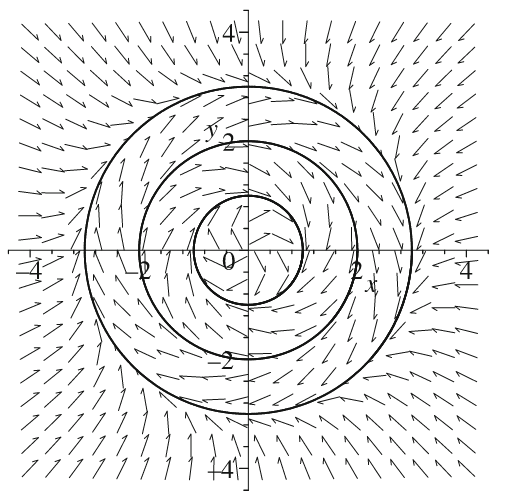

# Theorems on the existence of closed orbits
### Poincaré-Bendixson theorem
Suppose that $\gamma^+$ is contained in a bounded region in which there are finitely many critical points. Then $\Gamma^+(\gamma)$ is either:
- a single critical point
- a single closed orbit
- a graphic- critical points joined by heteroclinic orbits.

A heteroclinic orbit connects to separate critical points and takes an infinite time to make the connection. 

### Corollary 
Let $D$ be a bounded closed set containing no critical points and suppose that $D$ is positively invariant. Then there exists a limit cycle contained in D. 

### Example 2 p 121
$$
\begin{array}{rl}
\dot{x}=&y-8x^3 \\
\dot{y}=&2y-4x-2y^3
\end{array}
$$

(-0.5, 0.5)

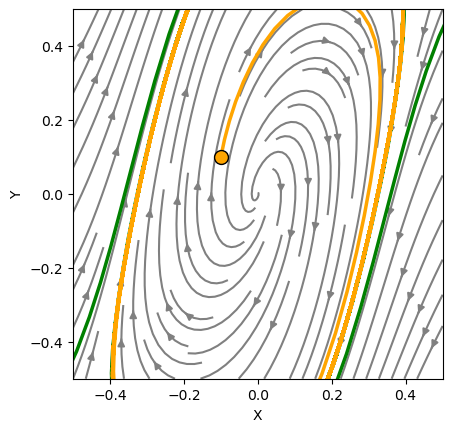

In [100]:
### Example 
def ex2p121(t,X,l=1,g=9.8):
    x,y=X
    dx=y-8*x**3
    dy=2*y-4*x-2*y**3
    return np.array([dx,dy])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
xymax=0.5
ax=plot_flow(ax,ex2p121,xrange=[-xymax,xymax],yrange=[-xymax,xymax],nullclines=False)
y0=[1,1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-1,-1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-0.1,0.1]
ax=plot_solution(ax,ex2p121,y0,t_end=150,color='orange')
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)

### Dulacs Criterion
Consider an annular region, $A$ contained in an open set $E$. If 
$$
\nabla \cdot (\psi \bf{X}) 
$$
does not change sign in $A$, where $\psi$ is continuously differentiable, then there is at most one limit cycle entirely contained in A. 

---

Do examples 3 and 4 on pages 122-123.

### Bendixson criterion, Non existence of limit cycles in the plane 
See Theorem on P123.
